In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('train_updated.csv')
df = pd.DataFrame(df)
#dropped rows with missing data 
#df = df.dropna()

In [2]:
df.head()

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,...,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,LastRecord,Date Deployed
0,28647,5.12,41.11,6.56,25.39,0.086667,-0.006667,4.37,91.70,15.70,...,2.375000,377.080000,367.428750,21.696250,39.005000,4174.875000,14.200000,60.701250,4/1/21,10/6/19
1,36175,36.60,5.16,6.23,6.96,0.136667,-1.296667,62.67,6.53,6.16,...,1.000000,350.517857,350.309286,19.883571,32.213571,4161.000000,19.777778,52.097143,4/1/21,10/27/19
2,16107,5.51,5.04,4.52,5.96,-0.460000,-0.083333,5.13,5.65,4.14,...,4.095238,346.113333,343.409524,13.675238,20.471429,4152.238095,19.200000,34.146667,4/1/21,10/31/19
3,27362,4.66,39.85,35.76,40.69,0.076667,-0.006667,3.93,76.37,60.86,...,0.736842,356.184211,349.844737,16.306842,26.189474,4164.631579,23.625000,42.496316,4/1/21,10/1/19
4,19463,5.10,43.24,4.63,5.26,0.040000,-0.153333,4.69,71.44,3.80,...,1.133333,370.904000,367.730000,18.797333,30.812000,4169.800000,12.666667,49.609333,4/1/21,9/13/19


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40500 entries, 0 to 40499
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   deviceid                     40500 non-null  int64  
 1   avg_time_charging_lag1       40500 non-null  float64
 2   avg_time_charging_lag2       40500 non-null  float64
 3   avg_time_charging_lag3       40500 non-null  float64
 4   avg_time_charging_lag7       40434 non-null  float64
 5   charging_rate_lag3           40500 non-null  float64
 6   charging_rate_lag7           40488 non-null  float64
 7   avg_time_discharging_lag1    40500 non-null  float64
 8   avg_time_discharging_lag2    40500 non-null  float64
 9   avg_time_discharging_lag3    40500 non-null  float64
 10  avg_time_discharging_lag7    40434 non-null  float64
 11  discharging_rate_lag3        40500 non-null  float64
 12  discharging_rate_lag7        40488 non-null  float64
 13  fail_7          

In [4]:
#dflag is df with lag columns
dflag = df[['avg_time_charging_lag1', 'avg_time_charging_lag2', 'avg_time_charging_lag3', 'avg_time_charging_lag4', 
            'avg_time_charging_lag5', 'avg_time_charging_lag6', 'avg_time_charging_lag7', 'avg_time_charging_lag8', 
            'avg_time_charging_lag9', 'avg_time_charging_lag10', 'avg_time_charging_lag11', 'avg_time_charging_lag12', 
            'avg_time_charging_lag13', 'avg_time_charging_lag14',

            'avg_time_discharging_lag1', 'avg_time_discharging_lag2', 'avg_time_discharging_lag3', 'avg_time_discharging_lag4',
            'avg_time_discharging_lag5', 'avg_time_discharging_lag6', 'avg_time_discharging_lag7', 'avg_time_discharging_lag8',
            'avg_time_discharging_lag9', 'avg_time_discharging_lag10', 'avg_time_discharging_lag11', 'avg_time_discharging_lag12', 
            'avg_time_discharging_lag13', 'avg_time_discharging_lag14',

            'charging_rate_lag3', 'charging_rate_lag4', 'charging_rate_lag5', 'charging_rate_lag6', 'charging_rate_lag7',

            'discharging_rate_lag3', 'discharging_rate_lag4', 'discharging_rate_lag5', 'discharging_rate_lag6', 
            'discharging_rate_lag7', 'discharging_rate_lag8']].copy()

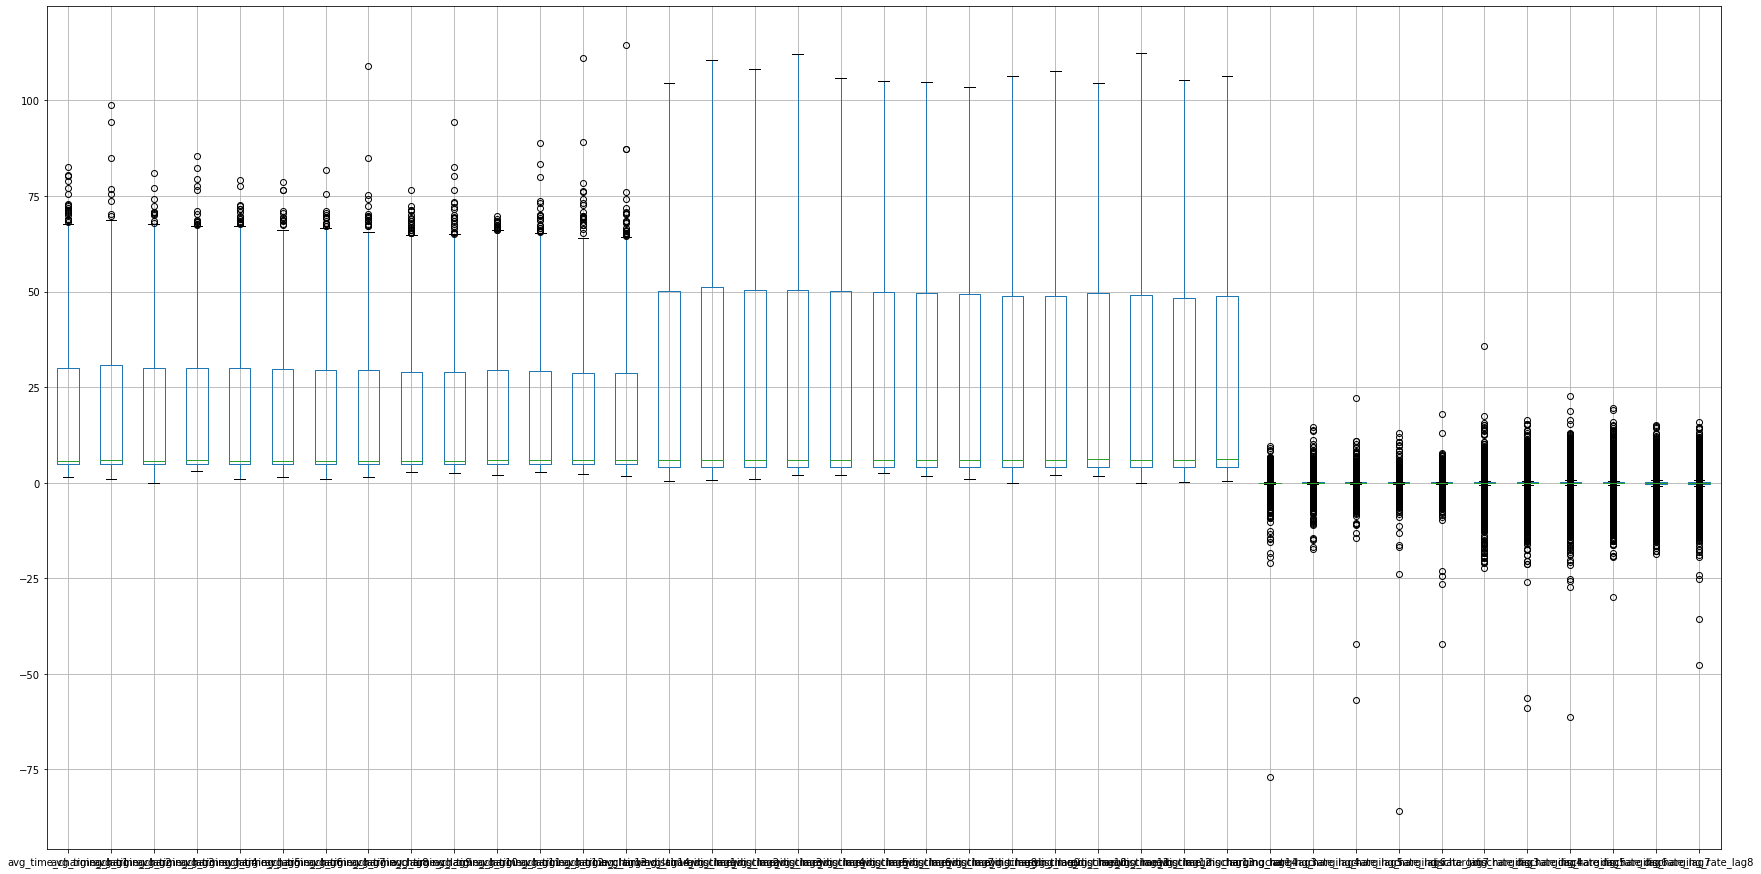

In [5]:
dflag.boxplot(figsize=(30,15.5))
plt.show()

In [6]:
#df2 is df without lag columns
df2 = df[['deviceid', 'chargecycles', 'dischargecycles', 'total_off_time',
       'number_times_restart', 'avg_volt_change_charging',
       'avg_volt_change_discharging', 'avg_time_charging',
       'avg_time_discharging', 'max_voltage_day', 'piececount', 'cycle_time', 'Date Deployed', 
          'charge_cycle_time_below_12', 'fail_7']].copy()

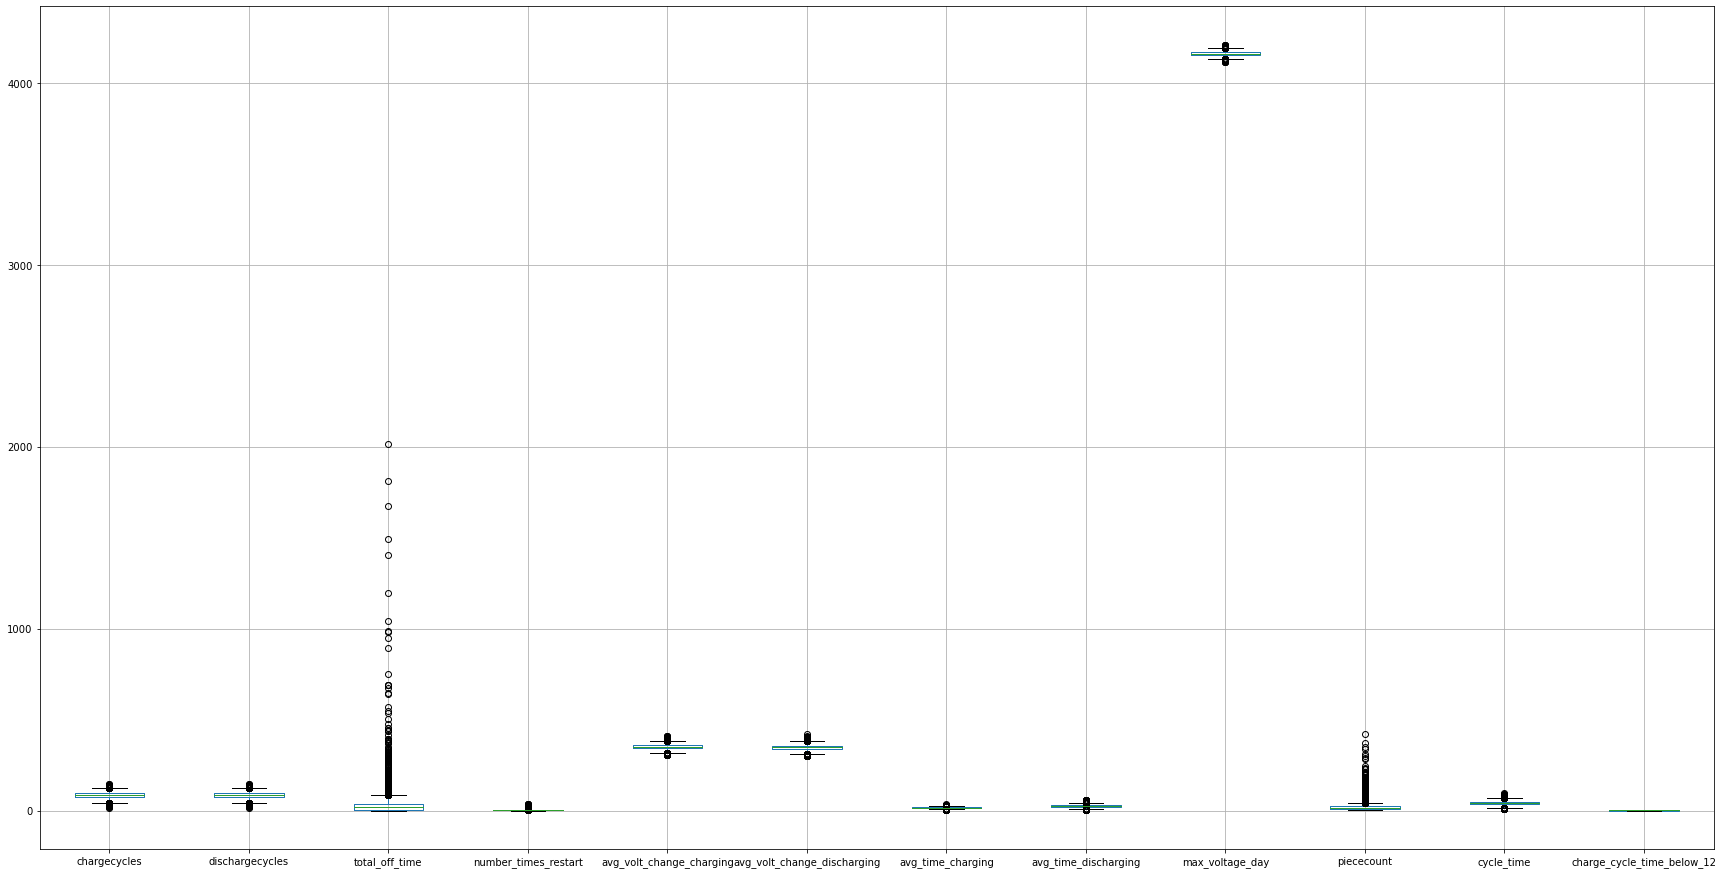

In [7]:
df2.drop(columns=["deviceid","fail_7"]).boxplot(figsize=(30,15.5))
plt.show()

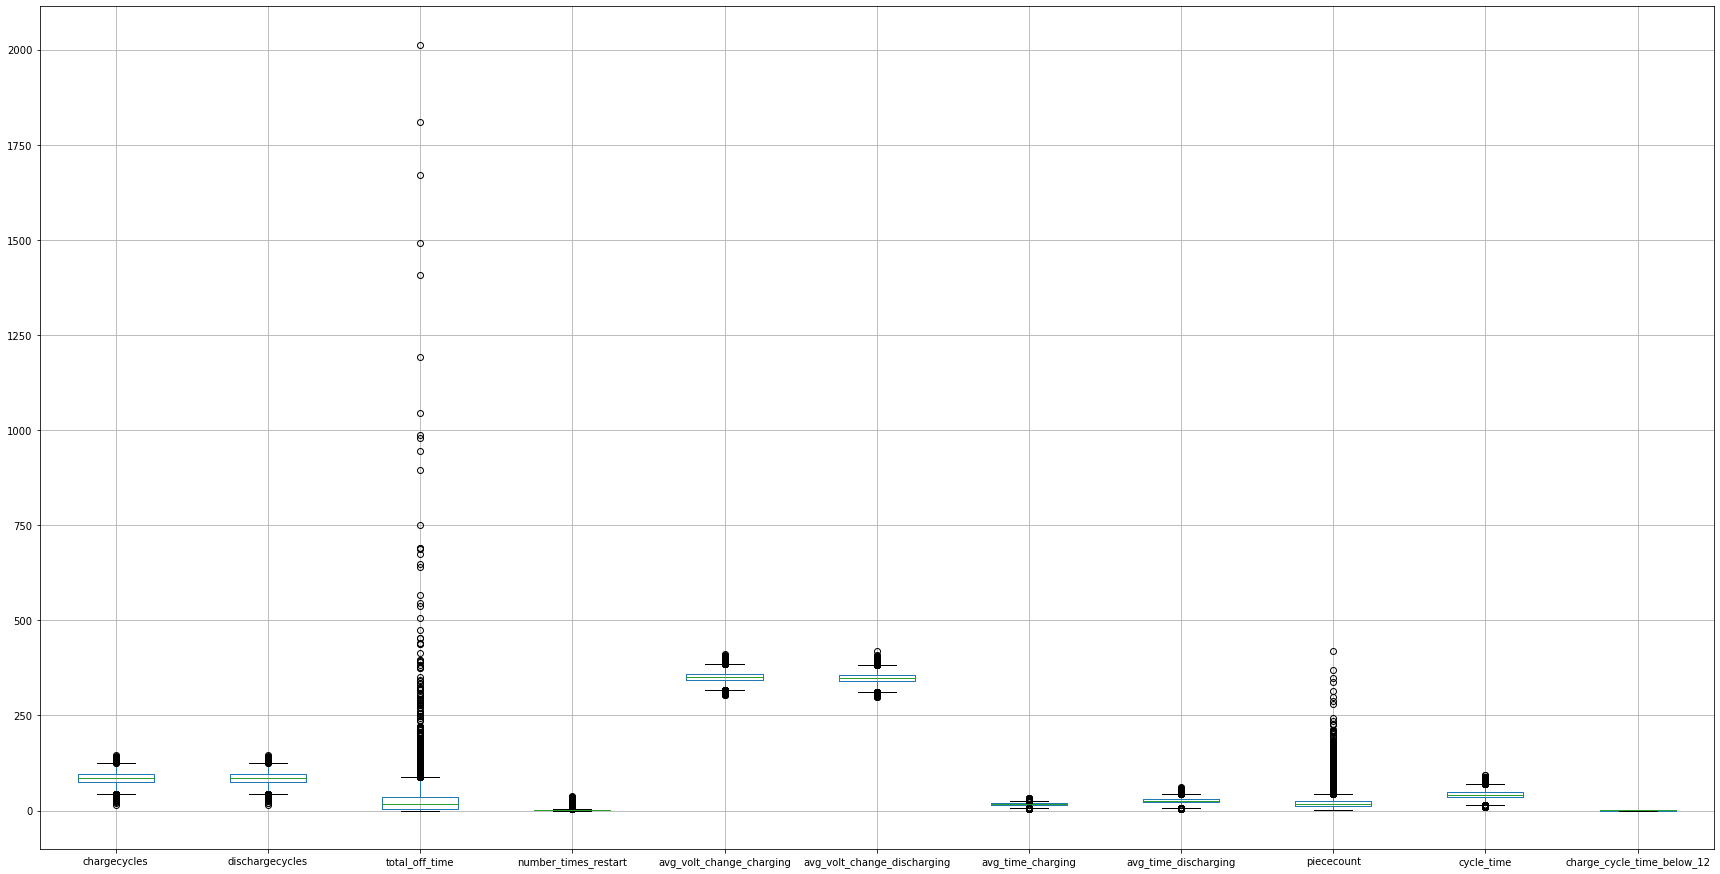

In [8]:
df2.drop(columns=["deviceid","fail_7", "max_voltage_day"]).boxplot(figsize=(30,15.5))
plt.show()

#### Split the data by response, fail_7

In [9]:
fail = df2[df2.fail_7 == 1].copy()
nofail = df2[df2.fail_7 == 0].copy()

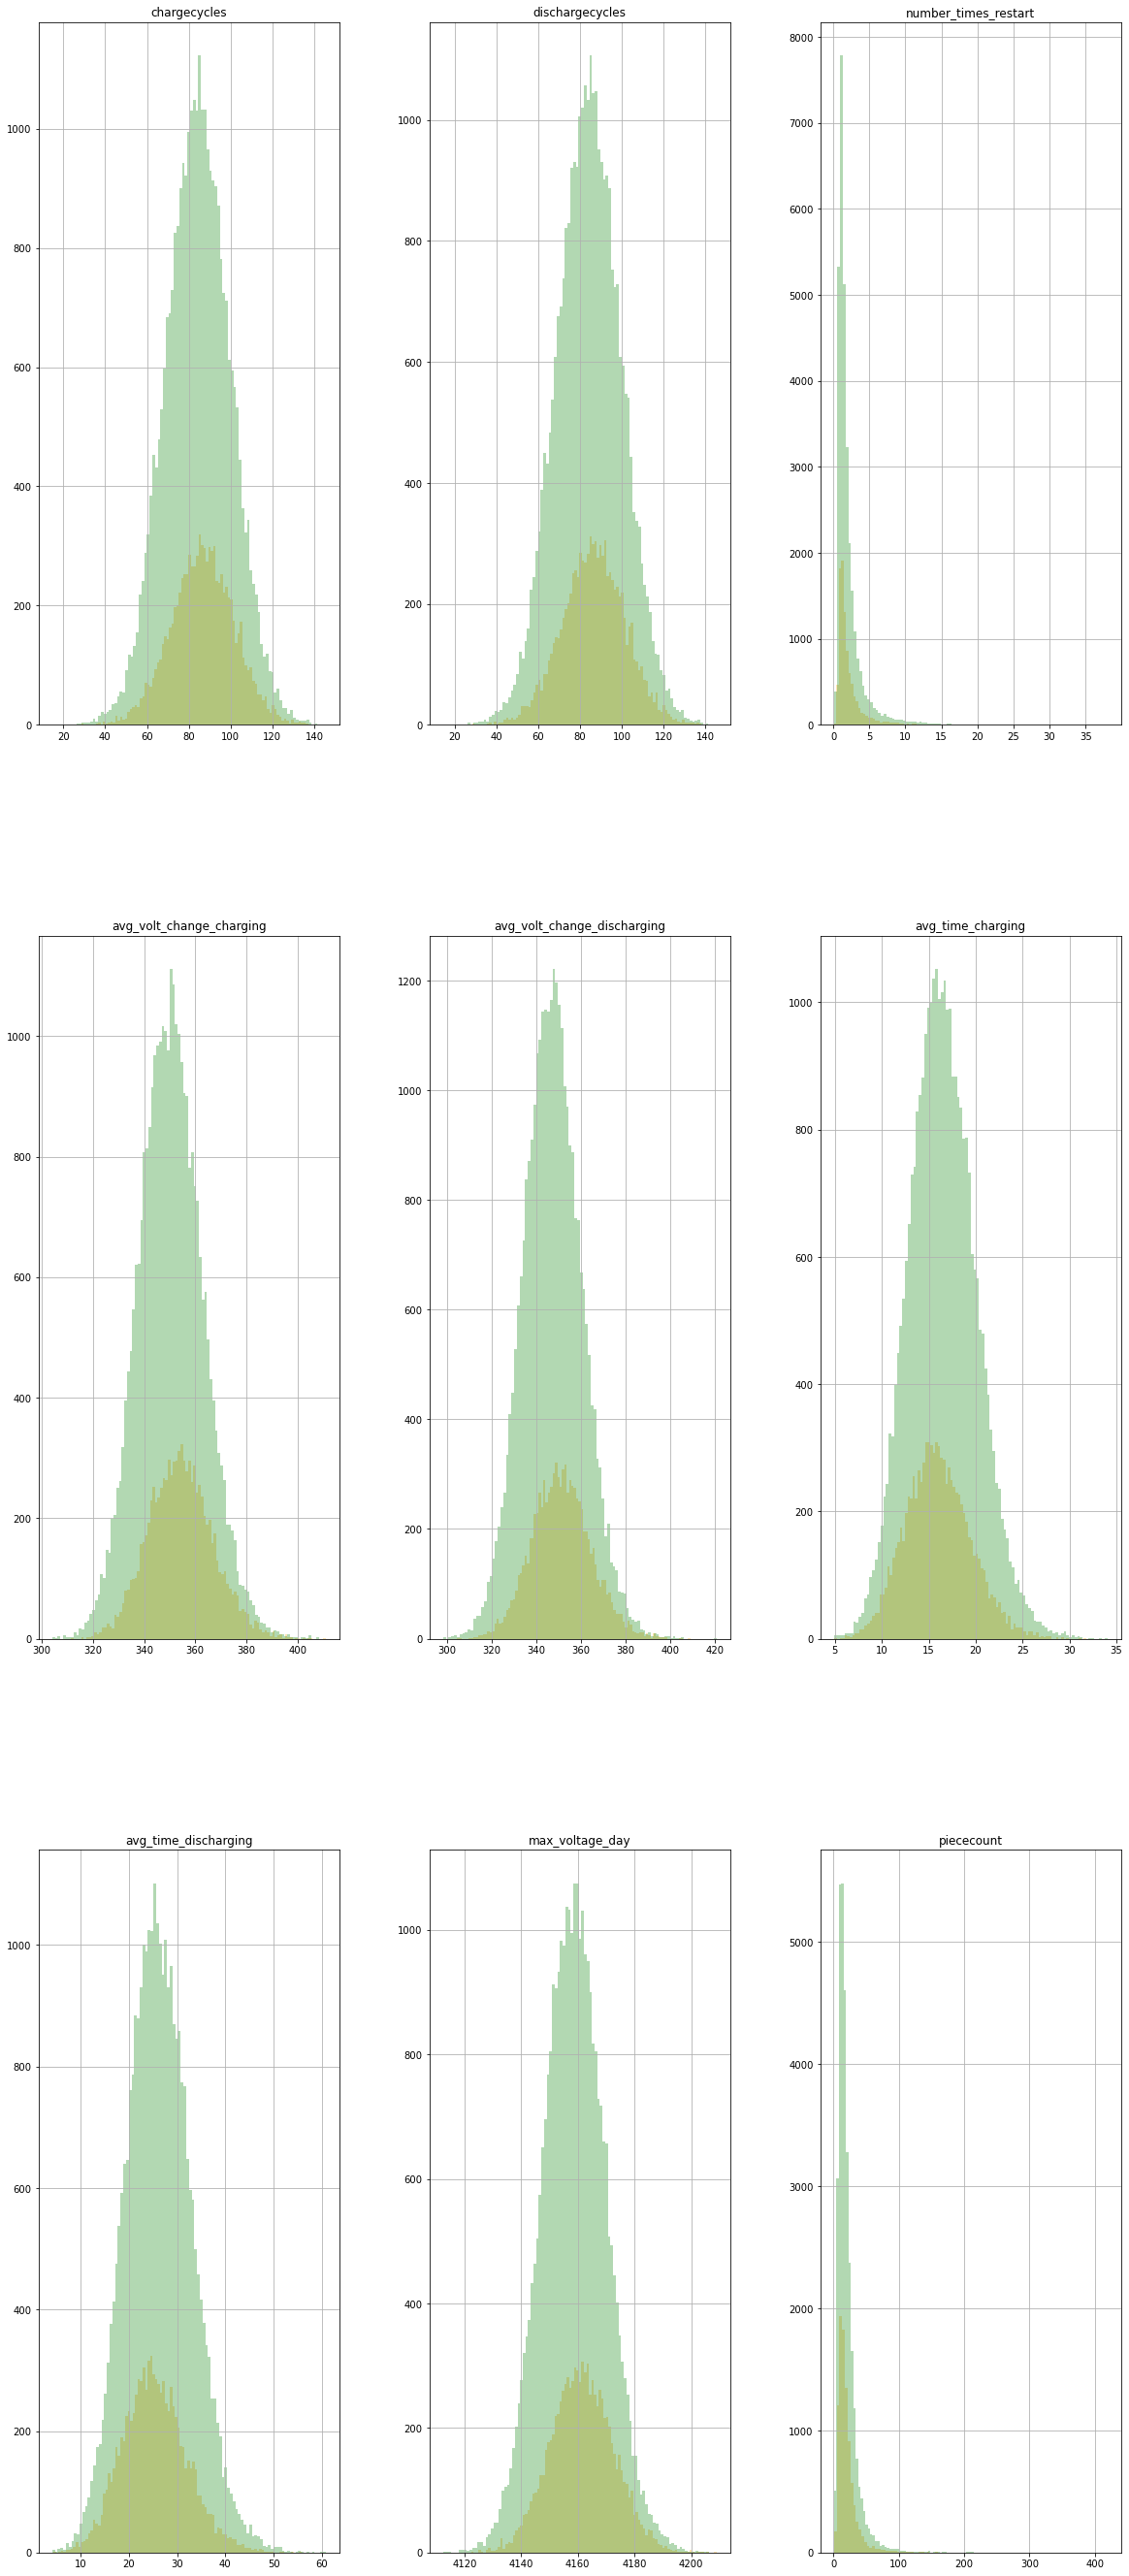

In [10]:
import matplotlib.pyplot as plt

index = df2.select_dtypes(include=["float","int"]).columns
index = index.drop('total_off_time')
cols=[i for i in index]

fig, axes = plt.subplots(len(cols)//3, 3, figsize=(20, 48))

i = 0
for triaxis in axes:
    for axis in triaxis:
        fail.hist(column = cols[i], bins = 100, ax=axis, color = 'orange', alpha = 0.3)
        nofail.hist(column = cols[i], bins = 100, ax=axis, color = 'green', alpha = 0.3)
        i = i+1

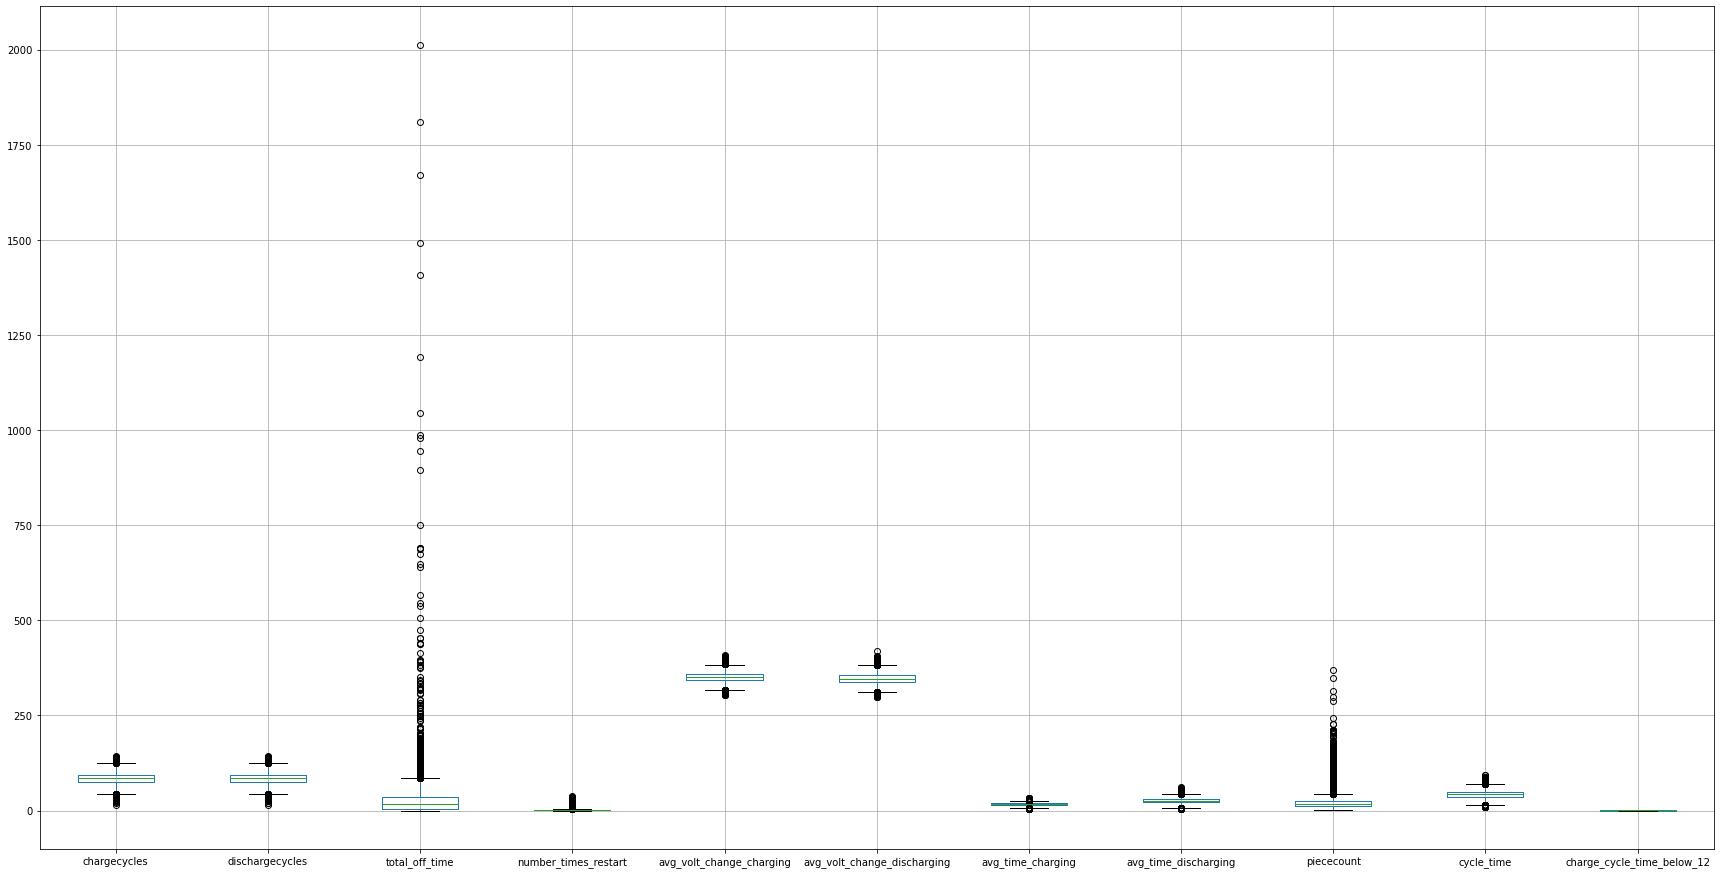

In [11]:
nofail.drop(columns=["deviceid","fail_7", "max_voltage_day"]).boxplot(figsize=(30,15.5))
plt.show()

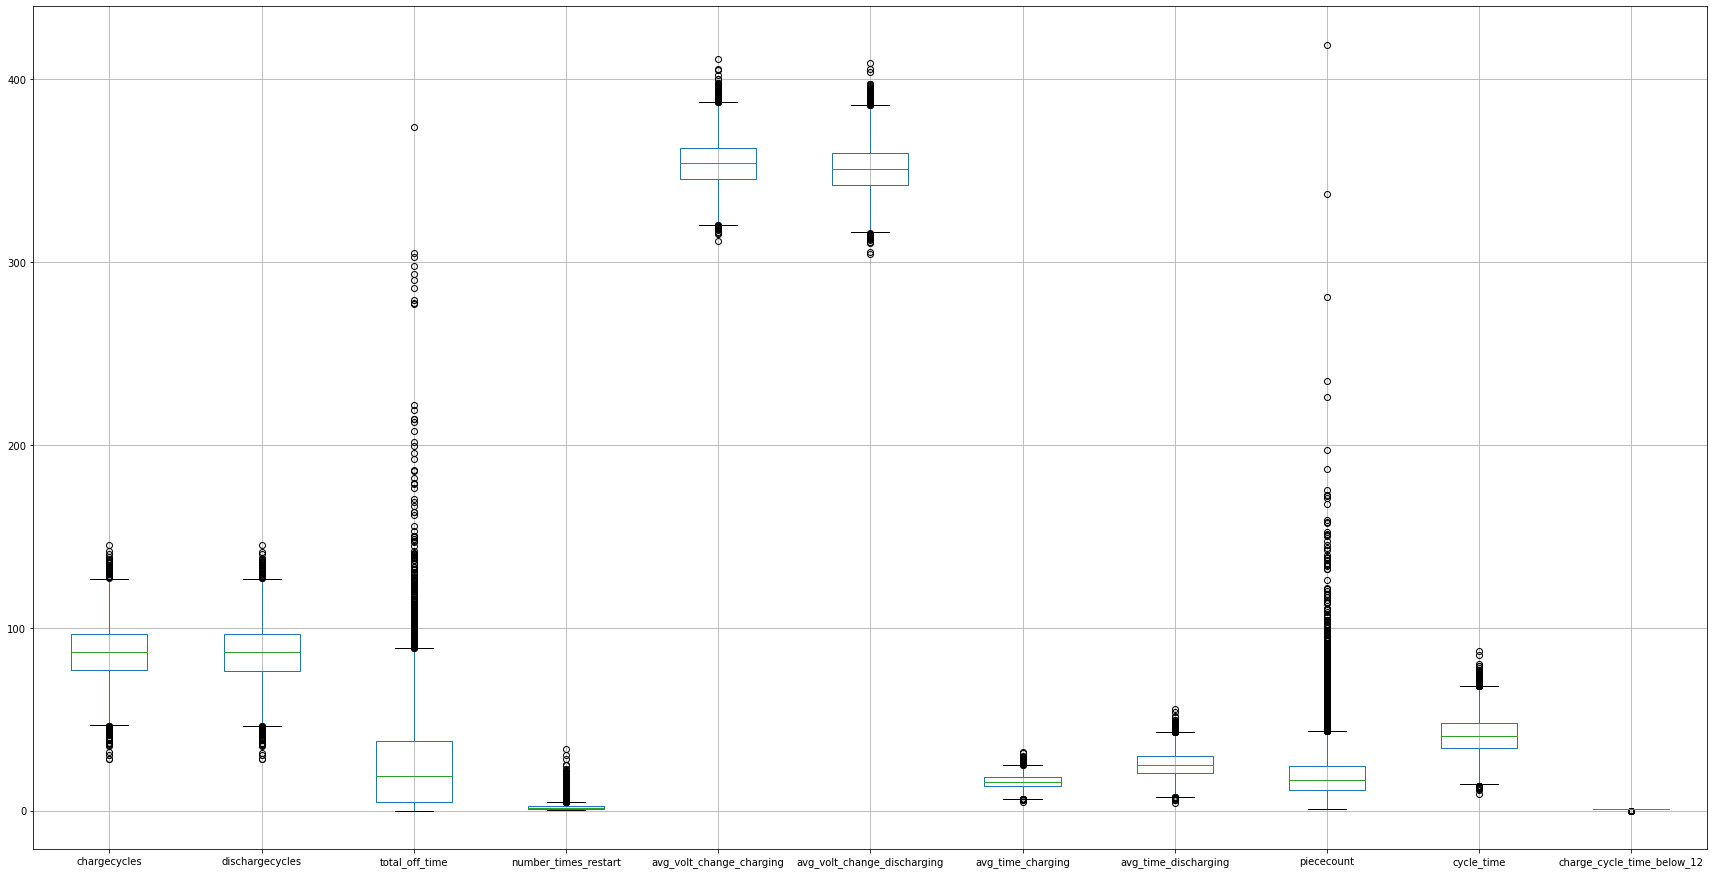

In [12]:
fail.drop(columns=["deviceid","fail_7", "max_voltage_day"]).boxplot(figsize=(30,15.5))
plt.show()

#### Analysis of (only) boolean predictor 'charge_cycle_time_below_12':
##### normal charge cycles is 12, bool variable is flag set for when that doesnt happen 

In [13]:
fail['charge_cycle_time_below_12'].value_counts(normalize=True)

#6993/failed.shape[0] = 85% of devices that failed had charge cycle time below 12 

True     0.849378
False    0.150622
Name: charge_cycle_time_below_12, dtype: float64

In [14]:
nofail['charge_cycle_time_below_12'].value_counts(normalize=True)

True     0.512364
False    0.487636
Name: charge_cycle_time_below_12, dtype: float64

In [15]:
#bool col CCTB12 True is when total charges cyles time less than 12 units (which is normal)

norm_charge_false_mask = df['charge_cycle_time_below_12'] == False
norm_charge_true_mask = df['charge_cycle_time_below_12'] == True

In [16]:
df[norm_charge_false_mask].fail_7.value_counts(normalize = True)
#of the devices that have normal charge cycles, 8.5% fail 

0    0.914601
1    0.085399
Name: fail_7, dtype: float64

In [17]:
df[norm_charge_true_mask].fail_7.value_counts(normalize = True)
#of the devices that do not have normal charge cycles, 33% fail 

0    0.666165
1    0.333835
Name: fail_7, dtype: float64

#### Analysis of total off time

In [18]:
tot_0_mask = df['total_off_time'] == 0 
tot_0 = df[tot_0_mask]
tot_0.fail_7.value_counts(normalize=True)

#When total off time is 0, 13% of devices fail

0    0.861761
1    0.138239
Name: fail_7, dtype: float64

In [19]:
df2.total_off_time.describe()

count    40500.000000
mean        25.258990
std         37.037053
min          0.000000
25%          3.565217
50%         17.097619
75%         37.000000
max       2013.000000
Name: total_off_time, dtype: float64

In [20]:
tot_max_fail_mask = df['total_off_time'] > 374
tot_max_fail = df[tot_max_fail_mask]
tot_max_fail.fail_7.value_counts()

#when total off time is greater than 374, no devices fail 

0    35
Name: fail_7, dtype: int64

Fail


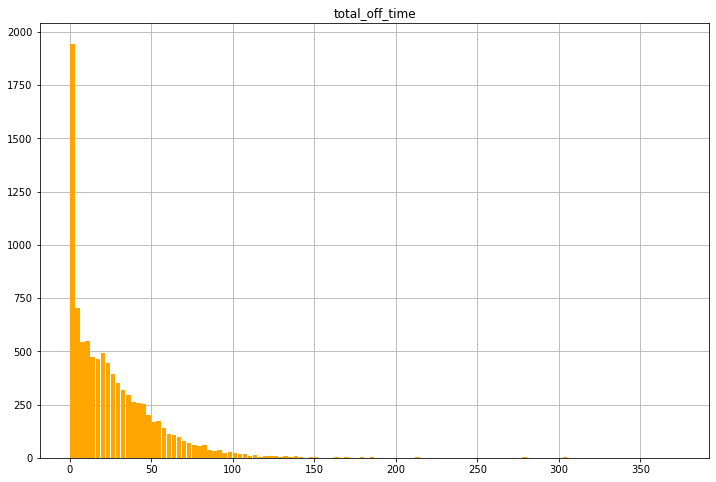

In [21]:
print('Fail')
display(ax = fail.hist(column='total_off_time', bins=120, figsize=(12,8), color='orange', zorder=2, rwidth=0.9))


No Fail


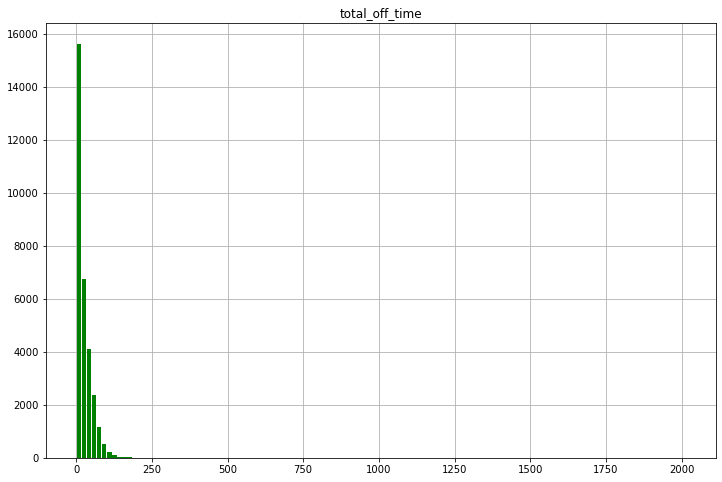

In [22]:
print('No Fail')
ax = nofail.hist(column='total_off_time', bins=120, figsize=(12,8), color='green', zorder=2, rwidth=0.9)

#### Adding new columns

In [23]:
ser_charging_rate = df[['charging_rate_lag3', 'charging_rate_lag4', 'charging_rate_lag5',
       'charging_rate_lag6', 'charging_rate_lag7']].mean(axis=1)
ser_discharging_rate = df[['discharging_rate_lag3',
       'discharging_rate_lag4', 'discharging_rate_lag5',
       'discharging_rate_lag6', 'discharging_rate_lag7',
       'discharging_rate_lag8']].mean(axis=1)
df2['AVG_charging_rate'] = ser_charging_rate
df2['AVG_discharging_rate'] = ser_discharging_rate

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40500 entries, 0 to 40499
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   deviceid                     40500 non-null  int64  
 1   chargecycles                 40500 non-null  float64
 2   dischargecycles              40500 non-null  float64
 3   total_off_time               40500 non-null  float64
 4   number_times_restart         40500 non-null  float64
 5   avg_volt_change_charging     40500 non-null  float64
 6   avg_volt_change_discharging  40500 non-null  float64
 7   avg_time_charging            40500 non-null  float64
 8   avg_time_discharging         40500 non-null  float64
 9   max_voltage_day              40500 non-null  float64
 10  piececount                   40500 non-null  float64
 11  cycle_time                   40500 non-null  float64
 12  Date Deployed                40500 non-null  object 
 13  charge_cycle_tim